In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
# from cplAE_MET.utils.dataset import  load_MET_dataset
from cplAE_MET.utils.load_config import load_config

In [2]:
def set_paths(config_file=None):
    paths, _ = load_config(config_file=config_file)
    paths['MET_data'] = f'{str(paths["MET_data"])}'
    return paths

In [3]:
paths = set_paths(config_file='config.toml')
dat = sio.loadmat(paths['MET_data'])
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'E_dat', 'T_dat', 'M_dat', 'soma_depth', 'hist_ax_de_api_bas', 'specimen_id', 'platform', 'class', 'group', 'subgroup', 'class_id', 'cluster_id', 'cluster_color', 'cluster_label', 'merged_cluster_label_at40', 'merged_cluster_label_at50', 'merged_cluster_label_at60', 'merged_cluster_label_at70', 'merged_cluster_label_at80', 'merged_cluster_label_at90', 'gene_ids', 'E_features', 'M_features'])

In [4]:
from pandas.api.types import CategoricalDtype


def order_cat(obs, cat='cluster', by='id'):
    """Order categories in dataframe for easy plotting
    Args:
        obs: ad.obs with columns f'{cat}_label'
        cat (str): 'cluster' or 'subclass'
        by (str): 'id'
    Returns:
        obs
    """
    df = obs.copy()[[f'{cat}_id', f'{cat}_label']]
    df = df.drop_duplicates().sort_values(by=f'{cat}_id')
    df = df.reset_index(drop=True)
    cat_type = CategoricalDtype(categories=df[f'{cat}_label'].to_list(),
                                ordered=True)
    obs[f'{cat}'] = obs[f'{cat}_label'].astype(cat_type)
    return obs, cat_type

# order_cat(df, cat='cluster')


In [5]:
df = pd.DataFrame({'cluster_id': dat['cluster_id'][0],
                  'cluster_label': [mystr.rstrip() for mystr in dat['cluster_label']],
                  'cluster_color': [mystr.rstrip() for mystr in dat['cluster_color']]})
df, cats = order_cat(df, cat='cluster')


palette = df.drop_duplicates()
# palette['cluster_label'] = [mystr.rstrip() for mystr in palette['cluster_label']
# palette['cluster_color'] = [mystr.rstrip() for mystr in palette['cluster_color']]
palette = dict(zip(palette['cluster_label'], palette['cluster_color']))

In [6]:
df

,cluster_id,cluster_label,cluster_color,cluster
0,77.0,Vip Lmo1 Myl1,#9FAAFF,Vip Lmo1 Myl1
1,62.0,Lamp5 Lsp1,#FFA388,Lamp5 Lsp1
2,NaN,nan,nan,nan
3,NaN,nan,nan,nan
4,NaN,nan,nan,nan
...,...,...,...,...
16698,92.0,Vip Pygm C1ql1,#BD3D9A,Vip Pygm C1ql1
16699,92.0,Vip Pygm C1ql1,#BD3D9A,Vip Pygm C1ql1
16700,NaN,nan,nan,nan
16701,NaN,nan,nan,nan


In [7]:
palette

{'Vip Lmo1 Myl1': '#9FAAFF',
 'Lamp5 Lsp1': '#FFA388',
 'nan': 'nan',
 'L6 CT VISp Ctxn3 Brinp3': '#74CAFF',
 'Pvalb Reln Itm2a': '#E67A77',
 'Vip Arhgap36 Hmcn1': '#9189FF',
 'Sst Calb2 Pdlim5': '#CC6D3D',
 'Sst Crhr2 Efemp1': '#B95541',
 'Vip Ptprt Pkp2': '#FF00FF',
 'Sst Esm1': '#C11331',
 'L6 IT VISp Penk Col27a1': '#A19922',
 'Vip Pygm C1ql1': '#BD3D9A',
 'Vip Crispld2 Htr2c': '#882E81',
 'Pvalb Sema3e Kank4': '#C94545',
 'L5 IT VISp Hsd11b1 Endou': '#00DDC5',
 'Sst Hpse Cbln4': '#806B19',
 'L5 PT VISp C1ql2 Cdh13': '#00A863',
 'Sst Hpse Sema3c': '#BF9F00',
 'Pvalb Gpr149 Islr': '#E62A5D',
 'L6b VISp Crh': '#254566',
 'L4 IT VISp Rspo1': '#00979D',
 'Lamp5 Plch2 Dock5': '#FF7290',
 'L6b P2ry12': '#336D99',
 'Sst Rxfp1 Prdm8': '#802600',
 'Sncg Slc17a8': '#9440F3',
 'Sst Tac2 Tacstd2': '#BF8219',
 'Sncg Vip Nptx2': '#9900B3',
 'L5 PT VISp Krt80': '#29E043',
 'Sst Rxfp1 Eya1': '#994C00',
 'Pvalb Tpbg': '#AF3F64',
 'Vip Rspo1 Itga4': '#B3128A',
 'L2/3 IT VISp Agmat': '#7AE6AB',
 'L6b

In [10]:
palette['nan'] = '#888888'

In [11]:
def valid_data(x):
    return np.sum(np.isnan(x).reshape(x.shape[0],-1),axis=1) == 0

isM = valid_data(dat['M_dat'])
isE = valid_data(dat['E_dat'])
isT = valid_data(dat['T_dat'])

print(f'T data: {np.sum(isT)}')
print(f'M data: {np.sum(isM)}')
print(f'E data: {np.sum(isE)}')

T data: 6552
M data: 10246
E data: 7733


In [12]:
print(f'TE data: {np.sum(np.logical_and(isT, isE))}')
print(f'TM data: {np.sum(np.logical_and(isT, isM))}')
print(f'ME data: {np.sum(np.logical_and(isM, isE))}')
print('---')
print(f'TME data: {np.sum(np.logical_and(np.logical_and(isM, isE),isT))}')

TE data: 5778
TM data: 1557
ME data: 1887
---
TME data: 1394


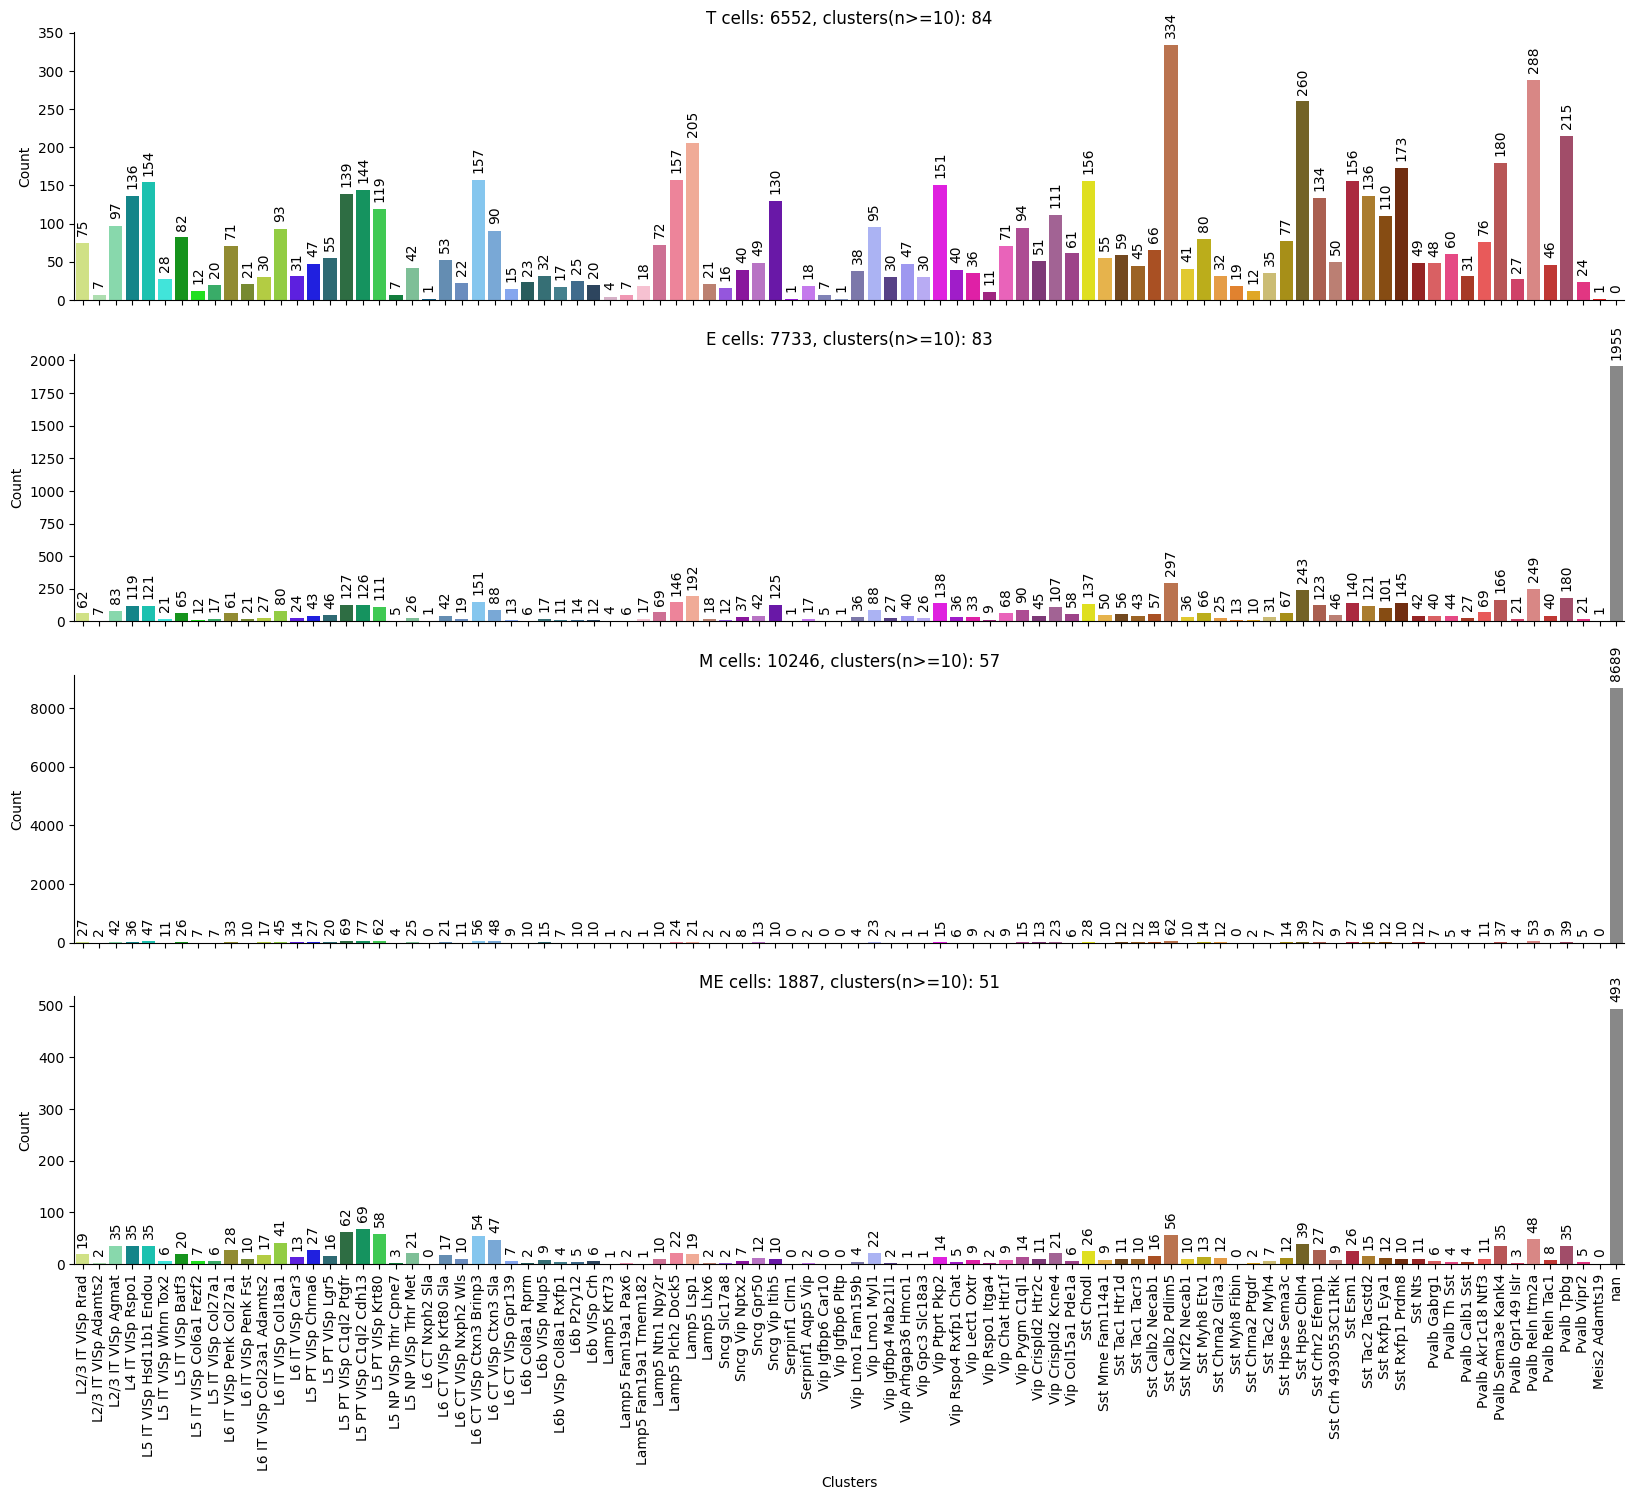

In [13]:
thr = 10


def well_sampled_clusters(bl, thr):
    """Counts the number of histogram bins that have more than `thr` number of samples"""
    count = 0
    for b in bl:
        if b.get_text() != '':
            if np.float64(b.get_text()) >= thr:
                count = count+1
    return count

f, axs = plt.subplots(4, 1, figsize=(20, 16))
ax = axs[0]
sns.countplot(data=df.loc[isT],
              x='cluster',
              palette=palette,
              ax=ax,
              linewidth=.5)
bl = ax.bar_label(ax.containers[0], padding=5)
[b.set_rotation(90) for b in bl]
n_well_sampled_clusters = well_sampled_clusters(bl, thr)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='',
       xticklabels=[],
       ylabel='Count',
       title=f'T cells: {np.sum(isT)}, clusters(n>={thr}): {n_well_sampled_clusters}')
sns.despine(ax=ax)

ax = axs[1]
sns.countplot(data=df.loc[isE],
              x='cluster',
              palette=palette,
              ax=ax,
              linewidth=.5)
bl = ax.bar_label(ax.containers[0], padding=5)
[b.set_rotation(90) for b in bl]
n_well_sampled_clusters = well_sampled_clusters(bl, thr)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='', xticklabels=[], ylabel='Count',
       title=f'E cells: {np.sum(isE)}, clusters(n>={thr}): {n_well_sampled_clusters}')
sns.despine(ax=ax)

ax = axs[2]
sns.countplot(data=df.loc[isM],
              x='cluster',
              palette=palette,
              ax=ax,
              linewidth=.5)
bl = ax.bar_label(ax.containers[0], padding=5)
[b.set_rotation(90) for b in bl]
n_well_sampled_clusters = well_sampled_clusters(bl, thr)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='', ylabel='Count',
       title=f'M cells: {np.sum(isM)}, clusters(n>={thr}): {n_well_sampled_clusters}', xticklabels=[])
sns.despine(ax=ax)

ax = axs[3]
sns.countplot(data=df.loc[np.logical_and(isM, isE)],
              x='cluster',
              palette=palette,
              ax=ax,
              linewidth=.5)
bl = ax.bar_label(ax.containers[0], padding=5)
[b.set_rotation(90) for b in bl]
n_well_sampled_clusters = well_sampled_clusters(bl, thr)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='Clusters', ylabel='Count',
       title=f'ME cells: {np.sum(np.logical_and(isM,isE))}, clusters(n>={thr}): {n_well_sampled_clusters}')
sns.despine(ax=ax)
plt.show()

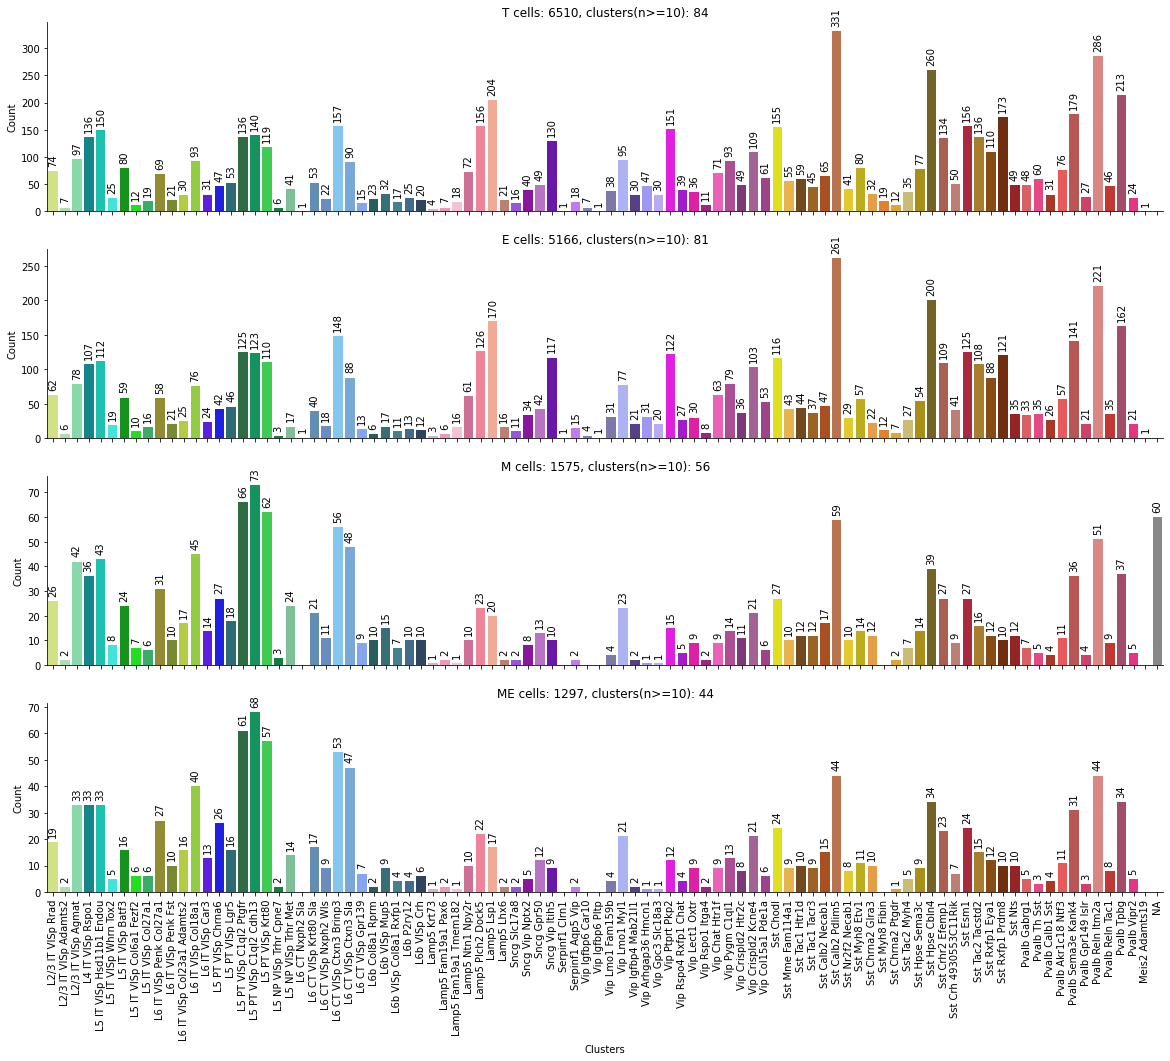

In [ ]:
thr = 10


def well_sampled_clusters(bl, thr):
    """Counts the number of histogram bins that have more than `thr` number of samples"""
    count = 0
    for b in bl:
        if b.get_text() != '':
            if np.float64(b.get_text()) >= thr:
                count = count+1
    return count

f, axs = plt.subplots(4, 1, figsize=(20, 16))
ax = axs[0]
sns.countplot(data=df.loc[isT],
              x='cluster',
              palette=palette,
              ax=ax,
              linewidth=.5)
bl = ax.bar_label(ax.containers[0], padding=5)
[b.set_rotation(90) for b in bl]
n_well_sampled_clusters = well_sampled_clusters(bl, thr)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='',
       xticklabels=[],
       ylabel='Count',
       title=f'T cells: {np.sum(isT)}, clusters(n>={thr}): {n_well_sampled_clusters}')
sns.despine(ax=ax)

ax = axs[1]
sns.countplot(data=df.loc[isE],
              x='cluster',
              palette=palette,
              ax=ax,
              linewidth=.5)
bl = ax.bar_label(ax.containers[0], padding=5)
[b.set_rotation(90) for b in bl]
n_well_sampled_clusters = well_sampled_clusters(bl, thr)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='', xticklabels=[], ylabel='Count',
       title=f'E cells: {np.sum(isE)}, clusters(n>={thr}): {n_well_sampled_clusters}')
sns.despine(ax=ax)

ax = axs[2]
sns.countplot(data=df.loc[isM],
              x='cluster',
              palette=palette,
              ax=ax,
              linewidth=.5)
bl = ax.bar_label(ax.containers[0], padding=5)
[b.set_rotation(90) for b in bl]
n_well_sampled_clusters = well_sampled_clusters(bl, thr)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='', ylabel='Count',
       title=f'M cells: {np.sum(isM)}, clusters(n>={thr}): {n_well_sampled_clusters}', xticklabels=[])
sns.despine(ax=ax)

ax = axs[3]
sns.countplot(data=df.loc[np.logical_and(isM, isE)],
              x='cluster',
              palette=palette,
              ax=ax,
              linewidth=.5)
bl = ax.bar_label(ax.containers[0], padding=5)
[b.set_rotation(90) for b in bl]
n_well_sampled_clusters = well_sampled_clusters(bl, thr)
ax.tick_params(axis='x', labelrotation=90)
ax.set(xlabel='Clusters', ylabel='Count',
       title=f'ME cells: {np.sum(np.logical_and(isM,isE))}, clusters(n>={thr}): {n_well_sampled_clusters}')
sns.despine(ax=ax)
plt.show()

#### Validation strategy
 - we want to test performance based on classification and cross-modal reconstruction.
 - to have ground truth for comparison, we require cells with (T,M and E) measurements
 - Moreover, evaluation of classification performance requires well-sampled t-types (to train the classifier)
 - there are 1297 such samples (cells)
 - only 38 t-types have >10 such cells

 > Select only from these well-sampled t-types using a stratified k-fold approach.

In [ ]:
# strategy above is implemented in the module:
from cplAE_MET.utils.dataset import get_MET_fold
from collections import Counter
from functools import reduce

# show number of samples per t-type in each validation fold:
df_list = []
for fold in range(10):
    train_ind, val_ind = get_MET_fold(dat,fold=fold)
    df = pd.DataFrame.from_dict(dict(Counter(dat['cluster_label'][val_ind])), orient='index')
    df.reset_index(inplace=True)
    df_list.append(df.rename(columns={0:fold}))

df = reduce(lambda x, y: pd.merge(x, y, how='left'), df_list)
df

,index,0,1,2,3,4,5,6,7,8,9
0,L2/3 IT VISp Rrad,1,2,2,2,2,2,2,2,2,2
1,L2/3 IT VISp Agmat,4,4,4,3,3,3,3,3,3,3
2,L4 IT VISp Rspo1,3,3,3,4,4,4,3,3,3,3
3,L5 IT VISp Hsd11b1 Endou,3,3,3,3,3,3,4,4,4,3
4,L5 IT VISp Batf3,2,2,2,2,2,1,1,1,1,2
5,L6 IT VISp Penk Col27a1,3,3,2,2,2,3,3,3,3,3
6,L6 IT VISp Penk Fst,1,1,1,1,1,1,1,1,1,1
7,L6 IT VISp Col18a1,4,4,4,4,4,4,4,4,4,4
8,L6 IT VISp Car3,1,1,2,2,2,1,1,1,1,1
9,L5 PT VISp Chrna6,3,2,2,2,2,3,3,3,3,3
